# Plotagem Avançada

Vamos agora considerar tipos de gráficos um pouco mas avançado

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Alterando Ticks no Matplotlib

No Matplotlib, os *ticks* são as marcas que aparecem nos eixos de um gráfico. Elas ajudam a mostrar as escalas e os valores representados no gráfico. Você pode personalizar esses ticks para ajustar a aparência dos eixos, melhorar a legibilidade do gráfico ou adaptar a visualização às suas necessidades.

O Matplotlib oferece funções para modificar os ticks nos eixos `x` e `y`. Você pode ajustar os valores, rótulos e até mesmo o intervalo entre os ticks.

Se você estiver trabalhando com um gráfico criado com `plt.subplots()`, pode usar os métodos `set_xticks()` e `set_yticks()` para definir manualmente os valores dos ticks.


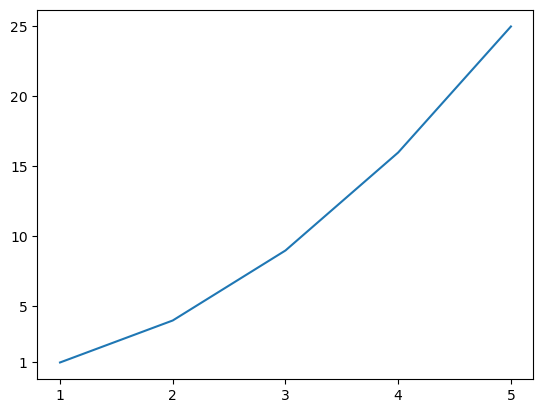

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

fig, ax = plt.subplots()

ax.plot(x, y)

# Definindo manualmente os valores dos ticks
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_yticks([1, 5, 10, 15, 20, 25])

plt.show()

Se você deseja que os ticks apareçam em intervalos específicos, pode definir os intervalos manualmente utilizando range() ou outra lógica.

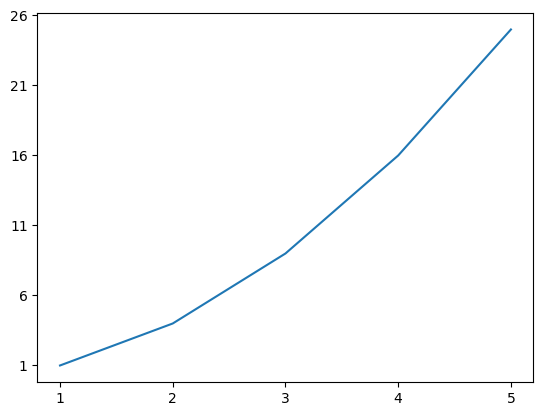

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y)

# Alterando os ticks do eixo X para aparecerem a cada 1 unidade
ax.set_xticks(range(1, 6, 1))

# Alterando os ticks do eixo Y para aparecerem a cada 5 unidades
ax.set_yticks(range(1, 30, 5))

plt.show()

Os rótulos dos ticks também podem ser personalizados com os métodos ``set_xticklabels()`` e ``set_yticklabels()``. Você pode passar uma lista de novos rótulos como segundo argumento.

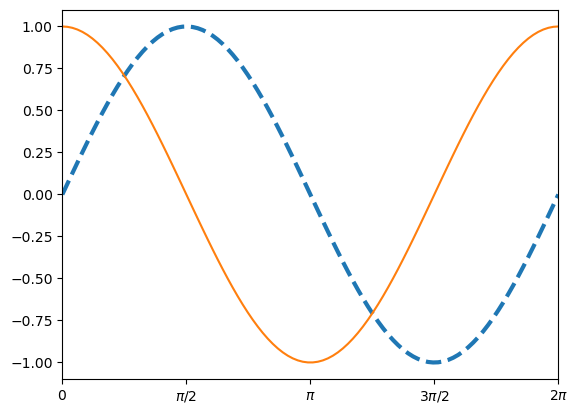

In [ ]:
x = np.linspace(0,2*np.pi,100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
ax.set_xlim(0.0, 2.0*np.pi)

ax.set_xticks([0, 0.5*np.pi, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['$0$', '$\\pi/2$', '$\\pi$', '$3 \\pi /2$', '$2 \\pi$'])

plt.show()


## Eixos logarítmicos

Em muitos casos, os dados podem variar em uma grande escala, o que pode tornar difícil a visualização de certos padrões em gráficos com escalas lineares. Uma solução comum é usar eixos logarítmicos, onde as distâncias entre os valores aumentam de forma exponencial, permitindo que variações em escalas grandes se tornem mais evidentes.

No Matplotlib, podemos facilmente transformar a escala de um eixo para logarítmica usando os métodos ``set_xscale()`` e ``set_yscale()``. Esses métodos permitem definir a escala de um eixo como **'log'**, o que faz com que os valores do eixo sejam representados em uma escala logarítmica.

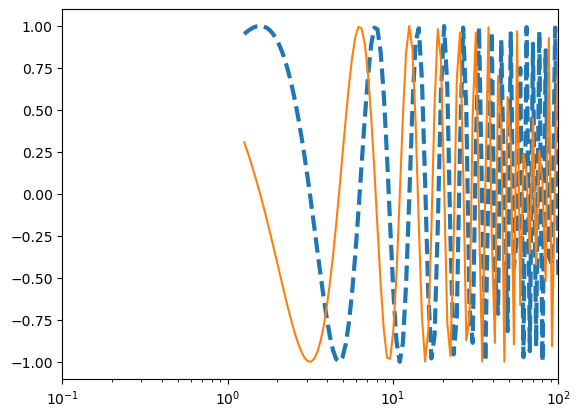

In [ ]:
x = np.logspace(0.1, 2, 100)  # Gera valores logaritmicamente espaçados

fig = plt.figure()
ax = fig.add_subplot(111)

# Plota uma função qualquer
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")

# Define o eixo X como logarítmico
ax.set_xscale('log')

# Define os limites do eixo X
ax.set_xlim([0.1, 100])

# Define os ticks no eixo X
ax.set_xticks([0.1, 1, 10, 100])

# Define os rótulos dos ticks no eixo X
ax.set_xticklabels(['$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$'])

# Exibe o gráfico
plt.show()


É importante evidenciar que como o logaritmo de valores negativos ou zero não é definido, ao usar escalas logarítmicas, é importante garantir que os dados não incluam tais valores.

Para aplicar uma escala logarítmica ao eixo y, basta usar o método ``set_yscale('log')``. Isso pode ser útil quando os dados no eixo y têm uma grande variação de valores, mas permanecem positivos.

## Barras de erro

Para experimentos, frequentemente temos erros associados aos valores de $y$. Aqui, criamos alguns dados e adicionamos um pouco de ruído a eles, depois os plotamos com erros.

In [ ]:
def y_experimento(a1, a2, sigma, x):
    """" retorna os dados experimentais de forma linear + aleatória 
        a1 é o intercepto, a2 é a inclinação, e sigma é o erro """


    N = len(x)

    # randn fornece amostras da distribuição "normal padrão"
    r = np.random.randn(N)
    y = a1 + a2*x + sigma*r
    return y

N = 40
x = np.linspace(0.0, 100.0, N)
sigma = 25.0*np.ones(N)
y = y_experimento(10.0, 3.0, sigma, x)

<ErrorbarContainer object of 3 artists>

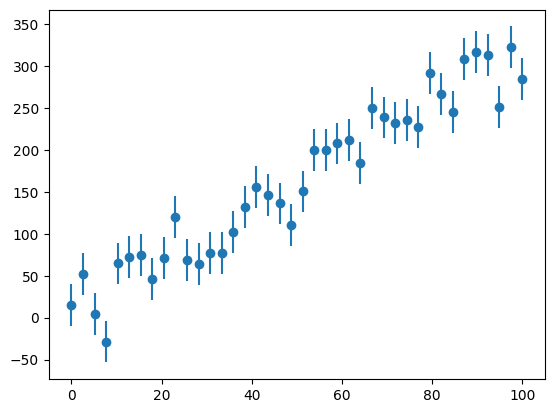

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=sigma, fmt="o")

## Anotações

Adicionar texto e anotações é fácil

In [ ]:
xx = np.linspace(0, 2.0*np.pi, 1000)

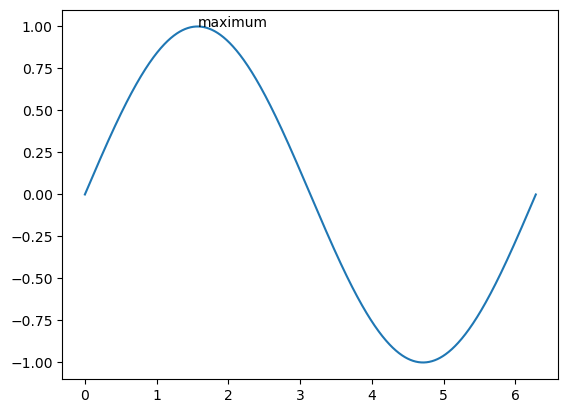

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, np.sin(xx))
ax.text(np.pi/2, np.sin(np.pi/2), "maximum")
plt.show()

Também podemos desativar as "margens" superior e direita

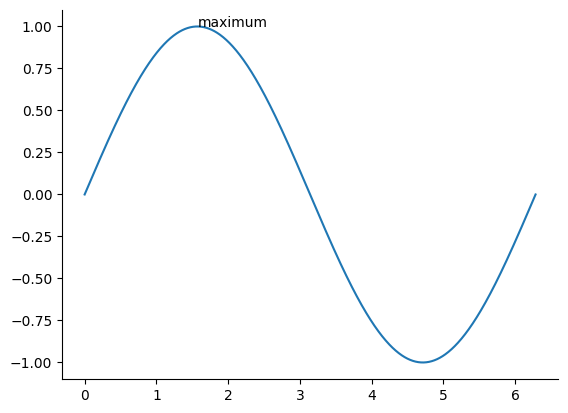

In [ ]:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left') 
fig

Podemos usar ``arrowprops`` para adicionar uma seta a um gráfico com uma cor personalizada:

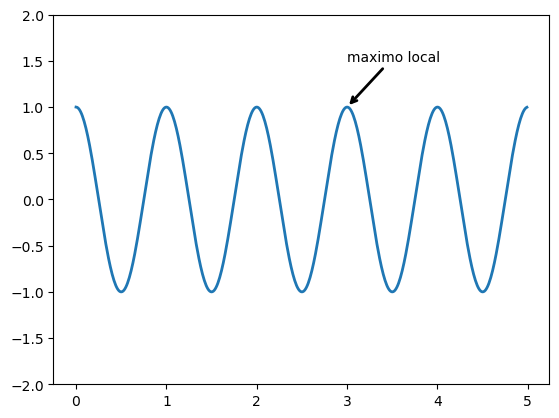

In [ ]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

plt.plot(t, s, lw=2)

plt.annotate('maximo local', 
             xy=(3, 1), # Ponto em que a seta aponta (no gráfico)
             xytext=(3, 1.5), # Localização do texto da anotação
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=2),
             )

plt.ylim(-2, 2)
plt.show()

## Gráficos de superfície

O Matplotlib não lida com dados 3D reais (ou seja, x, y, z + um valor), mas ele pode plotar superfícies 2D e linhas em 3D.

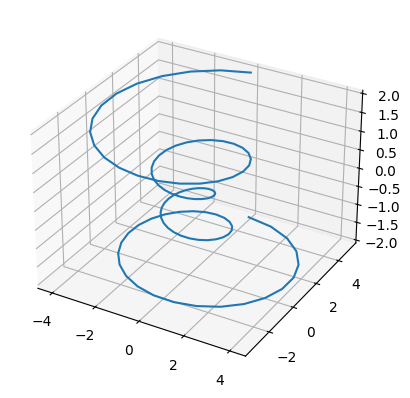

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection="3d")

# parametric curves
N = 100
theta = np.linspace(-4*np.pi, 4*np.pi, N)
z = np.linspace(-2, 2, N)
r = z**2 + 1

x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z)

## Histogramas

Um histograma é uma representação gráfica que mostra como os dados estão distribuídos ao dividir o intervalo dos dados em bins (caixas) e contar quantos valores estão em cada bin. Ele é útil para visualizar a frequência de ocorrência de diferentes intervalos de valores em um conjunto de dados.

No Python, o matplotlib fornece a função `hist()` para criar histogramas.

Podemos interpretar os argumentos da seguinte forma
- `density=True` para obter a normalização correta (área igual a 1)
- `data`: dados a serem visualizados.
- `bins=30`: número de intervalos (bins) no histograma. Mais bins trazem mais detalhes.
- `color='blue'`: cor das barras do histograma.
- `edgecolor='black'`: cor das bordas das barras.

Aqui geramos vários números aleatórios normalizados por uma gaussiana e fazemos um histograma. A distribuição de probabilidade deve coincidir com

$$y(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-x^2/(2\sigma^2)}$$


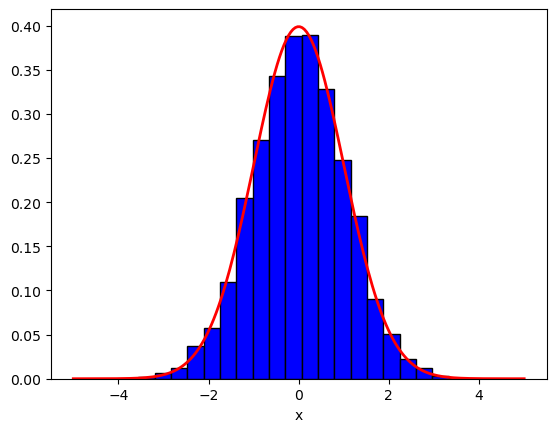

In [ ]:
N = 10000
r = np.random.randn(N)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(r, density=True, bins=20, color='blue', edgecolor='black')

x = np.linspace(-5,5,200)
sigma = 1.0
ax.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
         c="r", lw=2)
ax.set_xlabel("x")

plt.show()

## Padrões: matplotlib rc

Você pode especificar opções gráficas padrão que serão usadas em todos os seus gráficos nesse script/notebook. Isso é feito através de `rcParams`. Por exemplo:

In [ ]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'


data = np.random.randn(50)
plt.plot(data)


Para voltar a configuração padrão, rodamos:

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault) #Reset


## Mais gráficos

Há muitos projetos novos, alguns construídos sobre o matplotlib, outros independentes.
Um objetivo comum para muitos deles é permitir a exploração interativa de dados no navegador. Muitos usam a biblioteca Javascript `d3.js` para isso.

- **mpld3**: http://mpld3.github.io/ (Funcionalidades 3D)
- **Bokeh**: http://bokeh.pydata.org/en/latest/ (amigável para o navegador)
- **plot.ly**: https://plotly.com/python/ (amigável para o navegador, talvez até demais)
- **Glue**: http://www.glueviz.org/en/stable/ (explorar relações entre conjuntos de dados relacionados)
- **D3PO**: http://d3po.org/
- **d3py**: https://github.com/mikedewar/d3py (inativo?)
- **Seaborn**: http://web.stanford.edu/~mwaskom/software/seaborn/ (baseado no matplotlib)
- **ggplot**: https://github.com/yhat/ggplot/ (para usuários de R)
